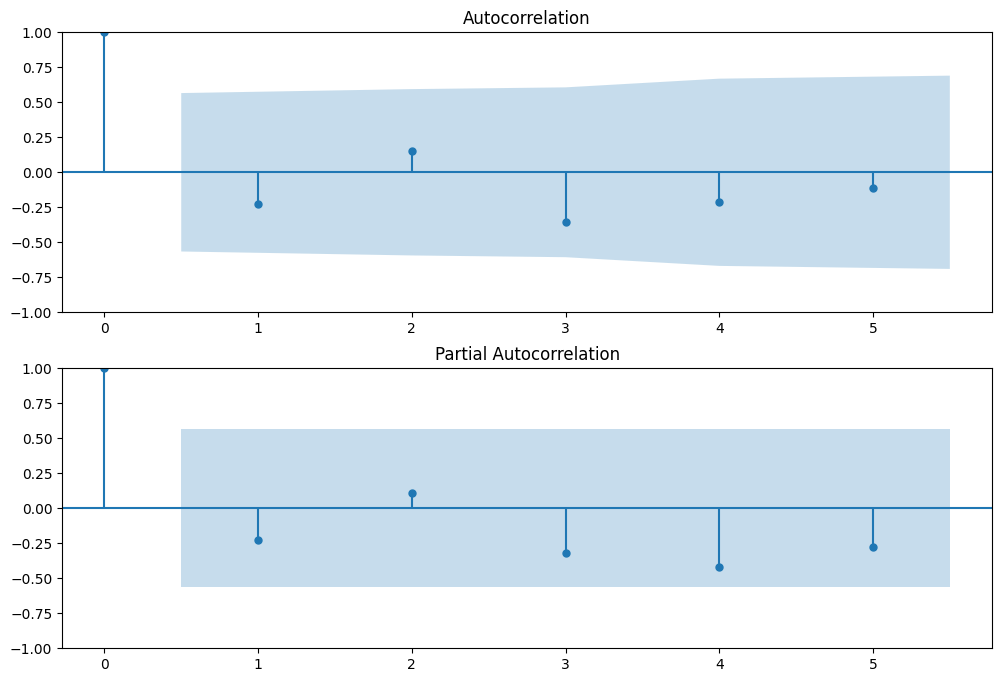

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' is your dataframe with the time series data
# Replace 'year' and 'amount' with your column names
# Make sure 'year' is in datetime format
df = pd.read_csv('yearly-investments.csv')

# Sample code to convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'])

# Set the 'year' column as the index
df.set_index('year', inplace=True)

df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['amount'].dropna(), ax=ax1, lags=5)
plot_pacf(df['amount'].dropna(), ax=ax2, lags=5)

plt.show()

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe with the time series data
# Assuming 'amount' is the name of the column

df = pd.read_csv('yearly-investments.csv')

# Convert the 'amount' column to numeric values
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Perform Dickey-Fuller test
result = adfuller(df['amount'].dropna())

# Print test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.523178
p-value: 0.522016
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844


In [2]:
import pandas as pd

# Assuming 'df' is your dataframe and 'amount' is the name of the column

# Convert the 'amount' column to numeric values
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Compute the first difference
df['stationary_data'] = df['amount'].diff()

# Drop any NaN values resulting from differencing
df.dropna(inplace=True)

# Now you can use the 'stationary_data' column for the ARIMA model

In [3]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your dataframe and 'stationary_data' is the name of the differenced column

# Perform Dickey-Fuller test on the differenced data
result = adfuller(df['stationary_data'])

# Print test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.742028
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your dataframe and 'stationary_data' is the name of the differenced column

# Fit the ARIMA model
model = ARIMA(df['stationary_data'], order=(1, 0, 1))  # Example order, you can adjust this based on the data
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        stationary_data   No. Observations:                   11
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -110.512
Date:                Sat, 28 Oct 2023   AIC                            229.023
Time:                        02:36:45   BIC                            230.615
Sample:                             0   HQIC                           228.020
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -996.2108   2324.963     -0.428      0.668   -5553.055    3560.633
ar.L1         -0.6902      1.342     -0.514      0.607      -3.321       1.941
ma.L1          0.0806      1.817      0.044      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
# Generate forecasts for future time points
forecast_values = model_fit.forecast(steps=12)  # Example: forecasting 12 future periods

# Print the forecasted values
print("Forecasted Values:")
print(forecast_values)

Forecasted Values:
11   -2321.611923
12     -81.354840
13   -1627.688578
14    -560.334279
15   -1297.073814
16    -788.540572
17   -1139.554799
18    -897.267811
19   -1064.506003
20    -949.070118
21   -1028.749546
22    -973.750953
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


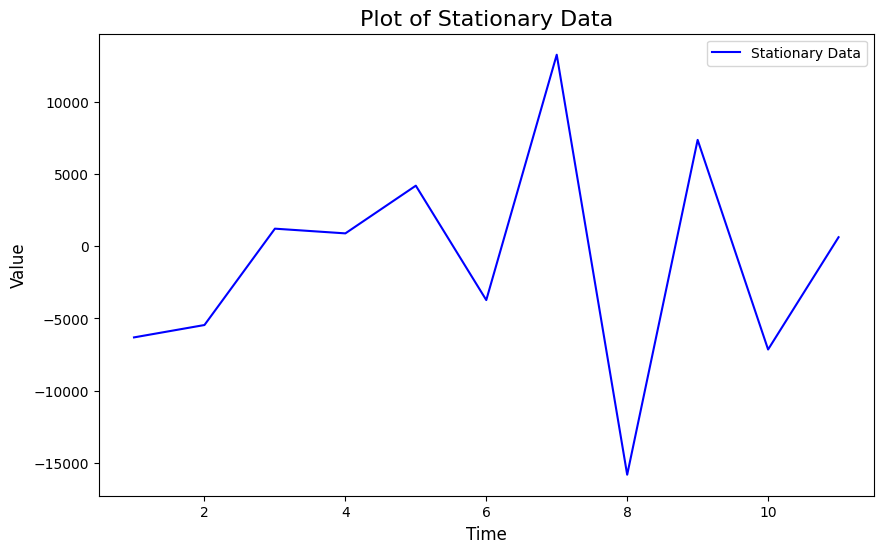

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe

# Plot the stationary data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['stationary_data'], label='Stationary Data', color='blue')

# Add titles and labels
plt.title('Plot of Stationary Data', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.show()

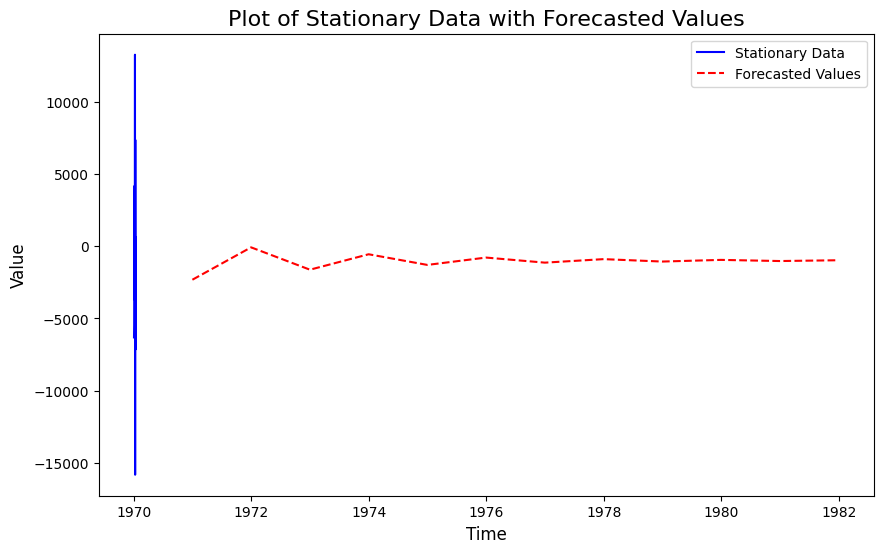

In [16]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Assuming 'forecast_values' contains the forecasted values

# Plot the stationary data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['stationary_data'], label='Stationary Data', color='blue')

# Plot the forecasted values
future_index = pd.date_range(start=df.index[-1], periods=12, freq='Y')
plt.plot(future_index, forecast_values, label='Forecasted Values', color='red', linestyle='dashed')

# Add titles and labels
plt.title('Plot of Stationary Data with Forecasted Values', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.show()

ValueError: ignored

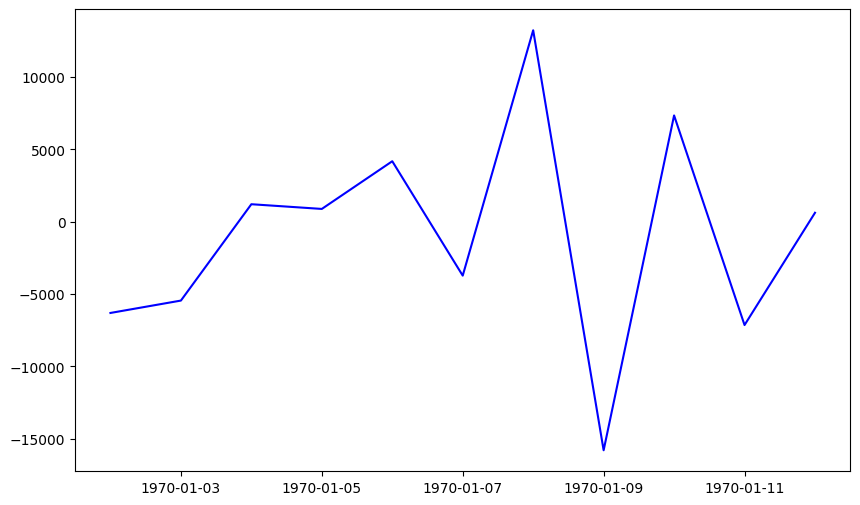

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Assuming 'forecast_values' contains the forecasted values

# Plot the stationary data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['stationary_data'], label='Stationary Data', color='blue')

# Plot the forecasted values for the next three years
future_index = pd.date_range(start=df.index[-1], periods=36, freq='MS')[1:]
plt.plot(future_index, forecast_values, label='Forecasted Values', color='red', linestyle='dashed')

# Add titles and labels
plt.title('Plot of Stationary Data with Forecasted Values for Three Years', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.show()